<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP06_reduction_de_la_dimensionnalite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 6 : réduction de la dimensionnalité

Dans ce TP, nous allons appliquer différentes méthodes de réduction de la dimensionnalité sur deux jeux de données. Nous essayerons aussi de faire une classification avec un kNN sur les coordonnées de basse dimensionalité sur le jeu de données des vins italiens.

Il n'y a pas d'exercice pour cette semaine, concentrez-vous sur votre rendu !

Les librairies et modules nécessaires sont



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Pour les couleurs dans les graphiques
from matplotlib import cm
from matplotlib.colors import ListedColormap
# Pour modifier la taille de sortie de graphiques dans le notebook
plt.rcParams['figure.figsize'] = [12, 12]
# Pour le traitement des données
from sklearn.preprocessing import StandardScaler
# Pour la PCA
from sklearn.decomposition import PCA
# Pour la PCA avec kernel
from sklearn.decomposition import KernelPCA
# Pour la LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Pour le TSNE
from sklearn.manifold import TSNE
# Pour la classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

---


## 1. Visualisation des iris

Commençons avec le jeux des iris. On charge le jeu de données, on isole la variable donnant les espèces et on standardise les variables numériques

In [2]:
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP6/iris.csv"
data = pd.read_csv(file_path)
labels = data["Species"]
coordinates = StandardScaler().fit_transform(data.drop(["Species"], axis=1))

On calcule les différentes coordonnées avec 4 méthodes :

1. La PCA.
2. La PCA avec un kernel "rbf" et les paramètres par défaut.
3. La LDA.
4. Le t-SNE, avec une perplexité de 8 (et quelques paramètres changés).

On effectue à chaque fois un `fit_transform()` pour obtenir directement les coordonnées de basse dimensionnalité. Attention, la dimensionnalité de l'espace résultant doit être précisé lors de la création de l'instance de la Classe en précisant l'argument `n_components`.

In [3]:
pca_coords = PCA(n_components=2).fit_transform(coordinates)
kca_coords = KernelPCA(n_components=2, kernel="rbf").fit_transform(coordinates)
lda_coords = LinearDiscriminantAnalysis(n_components=2).fit_transform(
    coordinates, labels)
sne_coords = TSNE(perplexity=8,
                  n_components=2,
                  learning_rate="auto",
                  init='pca').fit_transform(coordinates)

On peut maintenant afficher nos différentes représentations en basse dimensionnalité.

[]

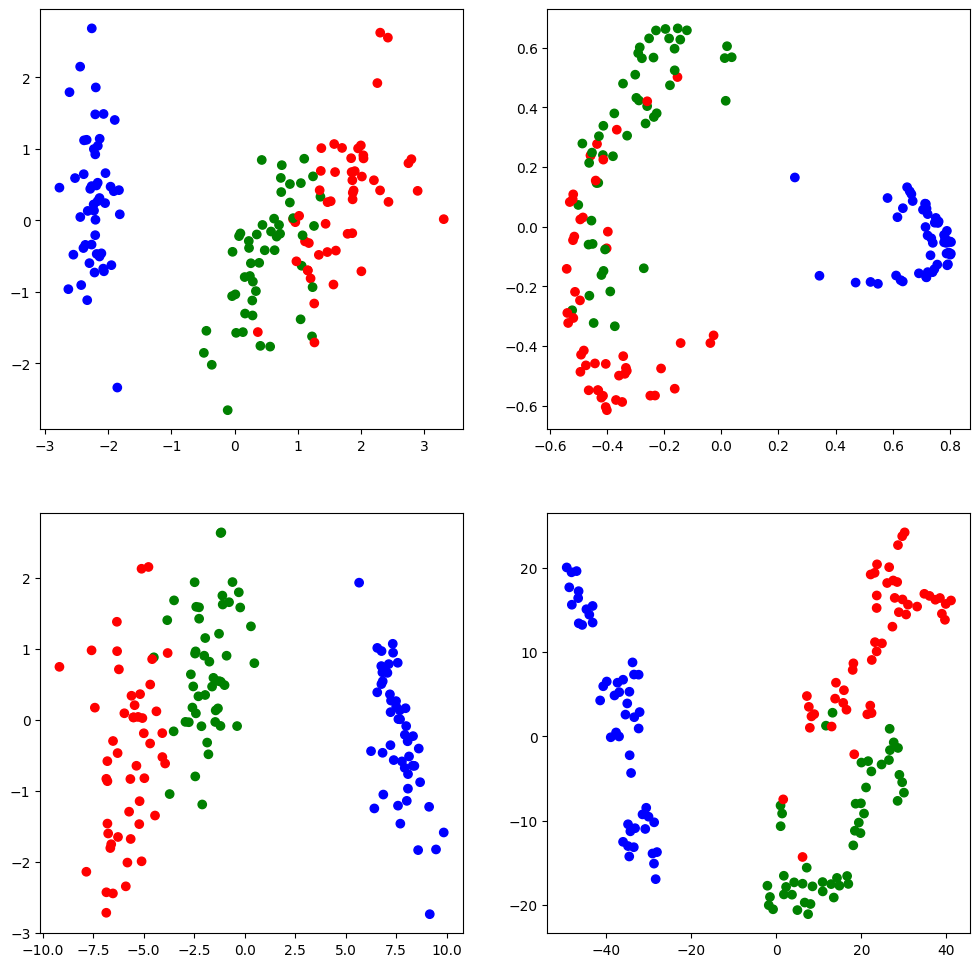

In [4]:
# Vecteur de couleurs
color_dict = {"virginica": "red", "versicolor": "green", "setosa": "blue"}
color_vec = [color_dict[label] for label in labels]

# Création des objets servant à l'affichage graphique
fig, axs = plt.subplots(2, 2)
# Coordonnées PCA
axs[0, 0].scatter(pca_coords[:, 0], pca_coords[:, 1], c=color_vec)
# Coordonéées kPCA
axs[0, 1].scatter(kca_coords[:, 0], kca_coords[:, 1], c=color_vec)
# Coordonnées LDA
axs[1, 0].scatter(lda_coords[:, 0], lda_coords[:, 1], c=color_vec)
# Coordonnées tSNE
axs[1, 1].scatter(sne_coords[:, 0], sne_coords[:, 1], c=color_vec)
plt.plot()

## 2. Visualisation du jeu de test de MNIST

On va maintenant voir si l'on peut afficher le jeu de test de MNIST (trouvé sur https://www.kaggle.com/datasets/oddrationale/mnist-in-csv). Nos variables numériques vont être les niveaux de gris sur les $28 \times 28 = 784$ pixels, les labels sont les chiffres qui ont été écrits.

On charge le jeu de données, on isole la variable donnant les chiffres et on standardise les variables numériques

In [5]:
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP6/mnist_test.csv"
data = pd.read_csv(file_path)
labels = data["label"]
groups = labels.unique() # Pour avoir les groupes
coordinates = StandardScaler().fit_transform(data.drop(["label"], axis=1))

In [6]:
data.shape

(10000, 785)

Encore une fois, on calcule les coordonnées de basse dimensionnalité avec nos 4 méthodes

In [7]:
pca_coords = PCA(n_components=2).fit_transform(coordinates)
kca_coords = KernelPCA(n_components=2, kernel="rbf").fit_transform(coordinates)
lda_coords = LinearDiscriminantAnalysis(n_components=2).fit_transform(
    coordinates, labels)
sne_coords = TSNE(perplexity=30,
                  n_components=2,
                  learning_rate="auto",
                  init='pca').fit_transform(coordinates)

Et on affiche les représentations. Notez que t-SNE sépare les différentes variétés sur lequelles sont les groupes.

/tmp/ipython-input-2037215402.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  hsv = cm.get_cmap("hsv", len(groups))


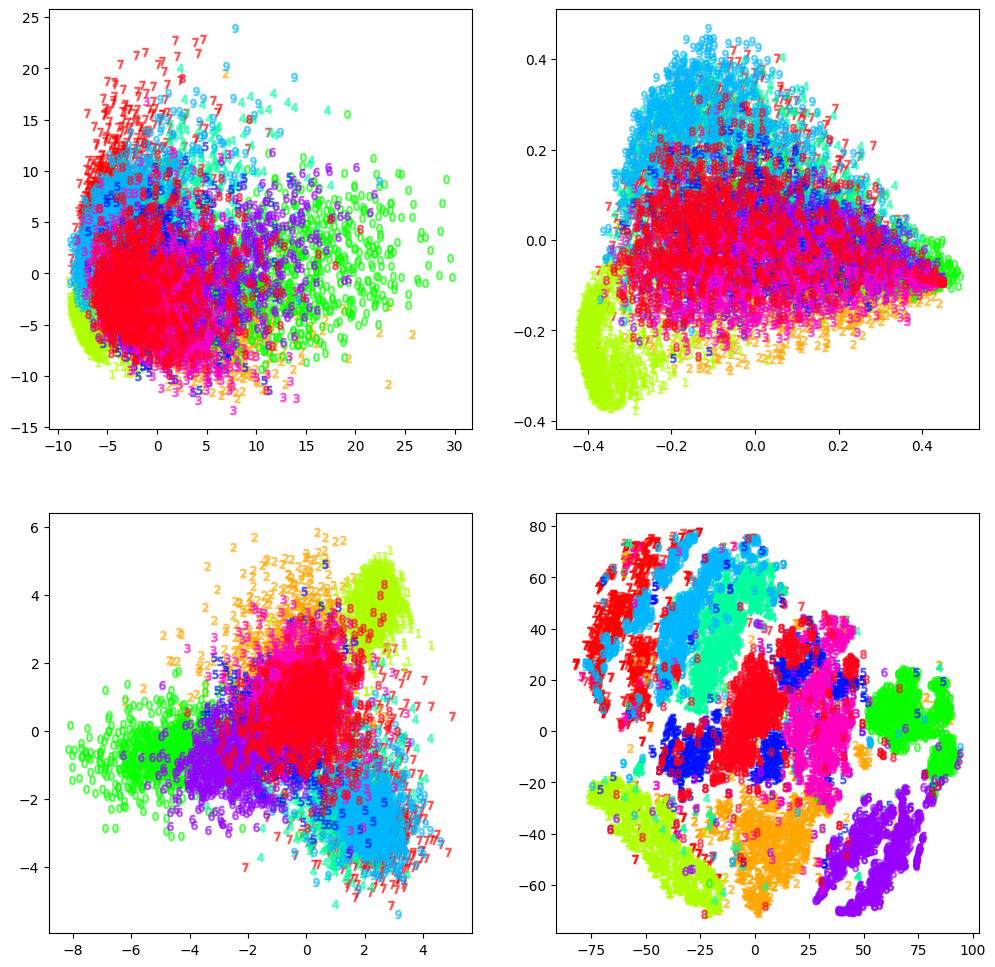

In [8]:
# Dictionnaire des couleurs
hsv = cm.get_cmap("hsv", len(groups))
cmap = hsv(range(len(groups)))
color_dict = {g:cmap[i, :] for i, g in enumerate(groups)}
# Dictionnaire des markers
marker_dict = {g:f"${g}$" for g in groups}
# Création des objets servant à l'affichage graphique
fig, axs = plt.subplots(2, 2)
# Coordonnées PCA
for i, g in enumerate(groups):
  axs[0, 0].scatter(pca_coords[labels==g, 0], pca_coords[labels==g, 1],
                    color=color_dict[g], marker=marker_dict[g], alpha=0.5)
# Coordonnées kPCA
for i, g in enumerate(groups):
  axs[0, 1].scatter(kca_coords[labels==g, 0], kca_coords[labels==g, 1],
                    color=color_dict[g], marker=marker_dict[g], alpha=0.5)
# Coordonnées LDA
for i, g in enumerate(groups):
  axs[1, 0].scatter(lda_coords[labels==g, 0], lda_coords[labels==g, 1],
                    color=color_dict[g], marker=marker_dict[g], alpha=0.5)
# Coordonnées tSNE
for i, g in enumerate(groups):
  axs[1, 1].scatter(sne_coords[labels==g, 0], sne_coords[labels==g, 1],
                    color=color_dict[g], marker=marker_dict[g], alpha=0.5)

## 3. Reduction de dimensionnalité et classification avec un knn sur le jeu de données des vins italiens

On va maintenant faire quelque chose d'un peu différent. Sur le jeu de données de vins italiens, on va essayer de trouver la représentation t-SNE en 2 dimensions qui permet la meilleure classification avec un kNN, en optimisant l'hyperparamètre du nombre de voisins.

Parfois, cela peut donner de meilleurs résultats en réduisant la dimensionnalité au préalable, mais même si ce n'est pas le cas, on peut avoir une information compressée qui représente de manière satisfaisante les différentes classes.

On commence par charger nos données et on les sépare en jeu d'entrainement/validation et test.

In [9]:
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP5/wine.data"
data = pd.read_csv(file_path, header=None)
inputs = StandardScaler().fit_transform(data.drop([0], axis=1))
outputs = data[0]
inputs_train_val, inputs_test, outputs_train_val, outputs_test \
  = train_test_split(inputs, outputs, test_size=0.15, stratify=outputs)

On entraine maintenant un modèle kNN avec 7 voisins (nombre tiré d'un précédent TP). Cela va nous servir de baseline.

In [10]:
# Nombre de voisins
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(inputs_train_val, outputs_train_val)
train_knn_acc = knn.score(inputs_train_val, outputs_train_val)
test_knn_acc = knn.score(inputs_test, outputs_test)
print(f"KNN : train={train_knn_acc: .2%}, test={test_knn_acc: .2%}")

KNN : train= 98.01%, test= 96.30%


On va maintenant chercher la meilleure perplexité pour notre classification kNN. On effectue une boucle sur les valeurs de la perplexité. A chaque itération, on calcule les coordonnées sur le jeu d'entrainement/validation et on optimise avec une CV l'hyperparamètre du nombre de voisins en utilisant les coordonnées t-SNE en entrée.

In [11]:
# Les valeurs de la perplexité
perp_vec = [2, 3, 5, 7, 10, 15, 20, 30]
# Les valeurs du nombre de voisins
n_neighbors_vec = list(range(1, 31))
param_dict = {"n_neighbors": n_neighbors_vec}
# On définit les membres des folds
n_cv = 5
# Pour stocker l'exactitude pour chaque perplexité
sne_acc = []
# Pour stocker le meilleur nombre de voisins
best_n_neighbors = []
# Boucle sur les lambdas
for perp in perp_vec:

  # On calcule les coordonnées TSNE
  sne_coords = TSNE(perplexity=perp,
                    n_components=2,
                    learning_rate="auto",
                    init='pca').fit_transform(inputs_train_val)


  # Recherche sur grille avec CV
  knn_classifier = KNeighborsClassifier()
  grid_search_knn = GridSearchCV(knn_classifier,
                                 param_dict,
                                 cv=n_cv)
  # On utilise en entrée les coordonnées du tSNE
  grid_search_knn.fit(sne_coords, outputs_train_val)

  # On sauve l'exactitude
  sne_acc.append(grid_search_knn.best_score_)
  # On sauve le nombre optimal de voisins
  best_n_neighbors.append(grid_search_knn.best_params_["n_neighbors"])

On va maintenant afficher l'exactitude et le nombre de voisins optimal pour toutes les valeurs de la perplexité.

[]

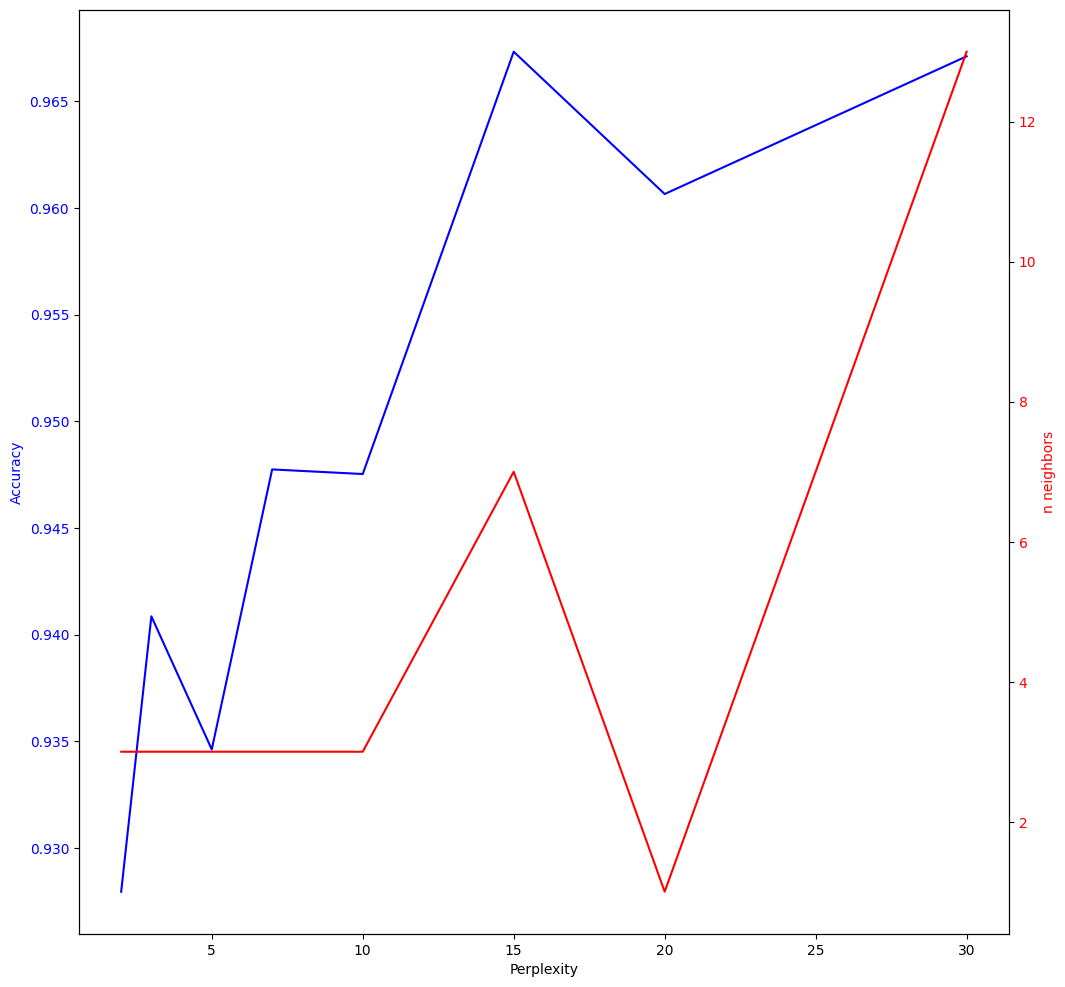

In [12]:
fig, ax = plt.subplots()

# Le plot de l'exactitude
ax.plot(perp_vec, sne_acc, c="blue")
ax.set_xlabel("Perplexity")
ax.set_ylabel("Accuracy", color="blue")
ax.tick_params(axis='y', labelcolor="blue")

# On créée un double axe
ax2 = ax.twinx()

# Le plot du nombre de voisins
ax2.plot(perp_vec, best_n_neighbors, c="red")
ax2.set_ylabel("n neighbors", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.plot()

Ayant extrait les meilleurs valeurs, on peut maintenant calculer les coordonnées de basse dimensionnalité qui semblent optimales sur tout le jeu de données. On le sépare à nouveau en jeu d'entrainement de de test.

In [13]:
# Indice de la meilleure d'exactitude
best_i = np.where(sne_acc == max(sne_acc))[0][0]
# Meilleure perplexité
best_perp = perp_vec[best_i]
# Meilleure nombre de voisins
best_n_nei = best_n_neighbors[best_i]
# On calcule les coordonnées TSNE sur tout le jeu de données
coords = TSNE(perplexity=best_perp,
              n_components=2,
              learning_rate="auto",
              init='pca').fit_transform(inputs)
# On sépare en jeu d'entrainement et test
coords_train, coords_test, outputs_train, outputs_test \
  = train_test_split(coords, outputs, test_size=0.15, stratify=outputs)

On entraine le modèle avec le nombre de voisins optimal, puis on regarde l'exactitude sur l'entrainement et le test.

In [14]:
sne_knn = KNeighborsClassifier(n_neighbors=best_n_nei)
sne_knn.fit(coords_train, outputs_train)
train_sne_acc = sne_knn.score(coords_train, outputs_train)
test_sne_acc = sne_knn.score(coords_test, outputs_test)
print(f"tSNE (per={best_perp}) + kNN (k={best_n_nei}) : "
      f"train={train_sne_acc:.2%}, test={test_sne_acc:.2%}")

tSNE (per=15) + kNN (k=7) : train=95.36%, test=88.89%


On va maintenant tracer l'affichage bidimensionnel obtenu, avec les frontières de décision de notre classifieur.

[]

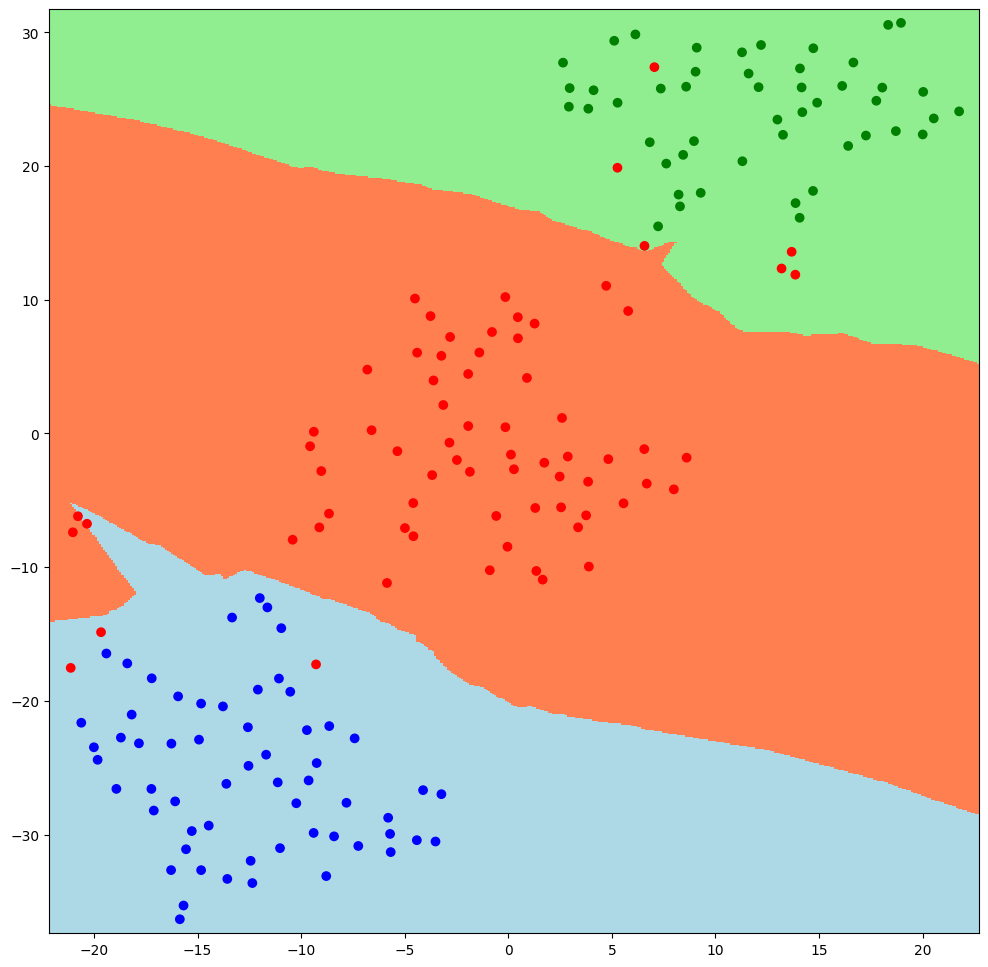

In [15]:
# Nos couleurs
mesh_cmap = ListedColormap(["lightblue", "coral", "lightgreen"])
points_cmap = ListedColormap(["blue", "red", "green"])
# La taille de la mesh
mesh_size = 0.1
# Les valeurs numériques des sorties
outputs_num = outputs.replace(["M", "F", "I"], [0, 1, 2])

# On fixe les limites
x_min, x_max = coords[:, 0].min() - 1, coords[:, 0].max() + 1
y_min, y_max = coords[:, 1].min() - 1, coords[:, 1].max() + 1
# On définit notre mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size),
                      np.arange(y_min, y_max, mesh_size))
# On fait les prédictions, que l'on transforme en valeurs numériques
grid_pred = sne_knn.predict(np.c_[xx.ravel(), yy.ravel()])
grid_pred_num = pd.Series(grid_pred).replace(["M", "F", "I"], [0, 1, 2])
grid_pred_num = grid_pred_num.to_numpy().reshape(xx.shape)

# On créée le graphique
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, grid_pred_num, cmap=mesh_cmap)
ax.scatter(coords[:, 0], coords[:, 1], c=outputs_num, cmap=points_cmap)
plt.plot()